# CRS Prof Predictor

By:

Mariano, Isaiah

Montealto, Meluisa

Regalario, Jeremiah

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import random

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Webscrape Data from CRS

## Links

In [ ]:
first_sem = "https://crs.upd.edu.ph/schedule/1{}1/Math"
second_sem = "https://crs.upd.edu.ph/schedule/1{}2/Math"
midyr = "https://crs.upd.edu.ph/schedule/1{}4/Math"

## Enter Year Range

In [ ]:
first_year = 2018
last_year = 2024

In [ ]:
links = []
for i in range(first_year, last_year + 1):
  exec(f"AY{i}{i + 1}A = first_sem.format(i)")
  exec(f"AY{i}{i + 1}B = second_sem.format(i)")
  exec(f"AY{i}{i + 1}M = midyr.format(i)")
  exec(f"links.append(AY{i}{i + 1}A)")
  exec(f"links.append(AY{i}{i + 1}B)")
  exec(f"links.append(AY{i}{i + 1}M)")

In [ ]:
AY20182019B

'https://crs.upd.edu.ph/schedule/120182/Math'

In [ ]:
links

['https://crs.upd.edu.ph/schedule/120181/Math',
 'https://crs.upd.edu.ph/schedule/120182/Math',
 'https://crs.upd.edu.ph/schedule/120184/Math',
 'https://crs.upd.edu.ph/schedule/120191/Math',
 'https://crs.upd.edu.ph/schedule/120192/Math',
 'https://crs.upd.edu.ph/schedule/120194/Math',
 'https://crs.upd.edu.ph/schedule/120201/Math',
 'https://crs.upd.edu.ph/schedule/120202/Math',
 'https://crs.upd.edu.ph/schedule/120204/Math',
 'https://crs.upd.edu.ph/schedule/120211/Math',
 'https://crs.upd.edu.ph/schedule/120212/Math',
 'https://crs.upd.edu.ph/schedule/120214/Math',
 'https://crs.upd.edu.ph/schedule/120221/Math',
 'https://crs.upd.edu.ph/schedule/120222/Math',
 'https://crs.upd.edu.ph/schedule/120224/Math',
 'https://crs.upd.edu.ph/schedule/120231/Math',
 'https://crs.upd.edu.ph/schedule/120232/Math',
 'https://crs.upd.edu.ph/schedule/120234/Math',
 'https://crs.upd.edu.ph/schedule/120241/Math',
 'https://crs.upd.edu.ph/schedule/120242/Math',
 'https://crs.upd.edu.ph/schedule/120244

## Webscraping using BeautifulSoup

In [ ]:
for link in links:
  page = requests.get(link)
  soup = BeautifulSoup(page.content, "html.parser")

  table = soup.find("table")
  headers = []
  for header in table.find_all('th'):
      headers.append(header.text.strip())
  rows = []
  for row in table.find_all('tr'):
      cells = row.find_all(['td', 'th'])
      cells = [cell.text.strip() for cell in cells]
      rows.append(cells)
  identifier = link.split("/")[4]
  exec("df{} = pd.DataFrame(rows, columns=headers)".format(identifier))
  exec("df{}['Year'] = identifier[1:5]".format(identifier)) #Start year
  exec("df{} = df{}.drop(df{}.index[0])".format(identifier, identifier, identifier))

In [ ]:
df120231.head()

,Class Code,Class,Credits,Schedule\n\t\tInstructor(s)\n\t\tRemarks,Enlisting Unit : BlockBlock Remarks,Available Slots /\n\t\tTotal Slots,Demand,Restrictions,Year
1,39233,Math 2 THR,3.0,"TTh 8:30-10AM lec MBAN 306\n\t\t\tCONSORTE, OD...",MATH,0 /\n\t\t\t\t51,0,"For: BS HE(2 slots), AIT(3 slots)",2023
2,39235,Math 2 THU,3.0,"TTh 10-11:30AM lec MBAN 306\n\t\t\tAGUILAR, AD...",MATH,0 /\n\t\t\t\t52,0,,2023
3,39430,Math 2 THU-1,3.0,"TTh 10-11:30AM lec MBAN 312\n\t\t\tLUY, JASMIN...",MATH,0 /\n\t\t\t\t30,0,,2023
4,39234,Math 2 THW,3.0,"TTh 1-2:30PM lec MBAN 306\n\t\t\tABARA, MA. NE...",MATH,0 /\n\t\t\t\t56,0,,2023
5,39242,Math 2 WFU,3.0,"WF 10-11:30AM lec MBAN 306\n\t\t\tGALVEZ, LUCK...",MATH,0 /\n\t\t\t\t51,0,"For: BA Film(1 slots), BA BMAS(1 slots), SLIS(...",2023


In [ ]:
len(df120231)

303

## Concatenate DataFrames

In [ ]:
for link in links[1:]:
  identifier = link.split("/")[4]
  exec("df120181 = pd.concat([df120181, df{}])".format(identifier))
df = df120181.copy()

In [ ]:
len(df)

3928

# Data Cleaning

In [ ]:
df.head()

,Class Code,Class,Credits,Schedule\n\t\tInstructor(s)\n\t\tRemarks,Enlisting Unit : BlockBlock Remarks,Available Slots /\n\t\tTotal Slots,Demand,Restrictions,Year
1,39236,Math 2 THR,3.0,"TTh 8:30-10AM lec TBA\n\t\t\tWALO, MA. LAILANI...",MATH,1 /\n\t\t\t\t64,0,,2018
2,39398,Math 2 THU,3.0,"TTh 10-11:30AM lec TBA\n\t\t\tCEJO, ROBERT JAY...",MATH,0 /\n\t\t\t\t59,0,,2018
3,39238,Math 2 THV,3.0,"TTh 11:30AM-1PM lec TBA\n\t\t\tWALO, MA. LAILA...",MATH,0 /\n\t\t\t\t63,0,,2018
4,39237,Math 2 WFV,3.0,"WF 11:30AM-1PM lec TBA\n\t\t\tAGUILAR, ADJANI\...",MATH,0 /\n\t\t\t\t65,0,,2018
5,39315,Math 10 THR,3.0,"TTh 8:30-10AM lec TBA\n\t\t\tARCEO, CARLENE PE...",MATH,0 /\n\t\t\t\t97,0,,2018


## Selected Columns

In [ ]:
df = df[['Class', 'Schedule\n\t\tInstructor(s)\n\t\tRemarks', 'Year']]
df.head()

,Class,Schedule\n\t\tInstructor(s)\n\t\tRemarks,Year
1,Math 2 THR,"TTh 8:30-10AM lec TBA\n\t\t\tWALO, MA. LAILANI...",2018
2,Math 2 THU,"TTh 10-11:30AM lec TBA\n\t\t\tCEJO, ROBERT JAY...",2018
3,Math 2 THV,"TTh 11:30AM-1PM lec TBA\n\t\t\tWALO, MA. LAILA...",2018
4,Math 2 WFV,"WF 11:30AM-1PM lec TBA\n\t\t\tAGUILAR, ADJANI\...",2018
5,Math 10 THR,"TTh 8:30-10AM lec TBA\n\t\t\tARCEO, CARLENE PE...",2018


## Math Class Number

In [ ]:
df['Number'] = df['Class'].str.split().str[1]
df.head()

,Class,Schedule\n\t\tInstructor(s)\n\t\tRemarks,Year,Number
1,Math 2 THR,"TTh 8:30-10AM lec TBA\n\t\t\tWALO, MA. LAILANI...",2018,2
2,Math 2 THU,"TTh 10-11:30AM lec TBA\n\t\t\tCEJO, ROBERT JAY...",2018,2
3,Math 2 THV,"TTh 11:30AM-1PM lec TBA\n\t\t\tWALO, MA. LAILA...",2018,2
4,Math 2 WFV,"WF 11:30AM-1PM lec TBA\n\t\t\tAGUILAR, ADJANI\...",2018,2
5,Math 10 THR,"TTh 8:30-10AM lec TBA\n\t\t\tARCEO, CARLENE PE...",2018,10


In [ ]:
df['Number'].unique()

array(['2', '10', '11', '14', '17', '20', '21', '30', '40', '53', '54',
       '55', '100', '102', '109', '110.1', '110.2', '110.3', '117', '121',
       '122', '123.1', '123.2', '128', '147', '150.1', '162', '164',
       '171', '180.1', '197', '200', '201', '202.1', '203', '205', '208',
       '209.1', '210.1', '211', '214', '220.1', '221', '222', '228',
       '229', '236', '240', '242', '243', '246', '260', '262.1', '265',
       '271.1', '280', '290', '294', '296', '297', '300', '400', '22',
       '108', '140', '142', '146', '148', '150.2', '196', '202.2', '204',
       '209.2', '210.2', '218', '220.2', '235', '241', '247', '250',
       '261', '262.2', '266', '271.2', '281', '295', '23', '217', '288',
       '249', '216', '133', '158', '190', '227', '126', '166', '282',
       '131', '258', '/', None], dtype=object)

## Remove / and None

In [ ]:
df = df[df['Number'] != '/']
len(df)

3911

In [ ]:
df = df[df['Number'].isna() == False]
len(df)

3909

## Create Day, Time, and Prof Columns

In [ ]:
# Function to extract day, time, and professor
def extract_info(schedule):
    day_pattern = r'\b(M|TTh|WF|S|TWThF)\b'
    time_pattern = r'\b\d{1,2}(?::\d{2})?(?:AM|PM)?-\d{1,2}(?::\d{2})?(?:AM|PM)?\b'

    prof_pattern = r'(?<=\n\t\t\t).*$'
    prof_match = re.search(prof_pattern, schedule, re.MULTILINE | re.DOTALL)
    prof = prof_match.group().strip() if prof_match else ''

    day = re.search(day_pattern, schedule)
    time = re.search(time_pattern, schedule)


    return (
        day.group() if day else '',
        time.group() if time else '',
        prof
    )

# Apply the function to the DataFrame
df[['Day', 'Time', 'Prof']] = df['Schedule\n\t\tInstructor(s)\n\t\tRemarks'].apply(lambda x: pd.Series(extract_info(x)))

In [ ]:
df['Prof'] = df['Prof'].str.split('\n').str[0]

In [ ]:
df = df.dropna(subset=['Prof'])  # Drop rows where 'Prof' is NaN
df = df.dropna(subset=['Prof'])  # Drop rows where 'Time' is NaN
df = df[~df['Prof'].str.upper().isin(['CONCEALED', 'TBA'])]

In [ ]:
df = df[["Number", "Day", "Time", "Prof", "Year"]]

In [ ]:
df

,Number,Day,Time,Prof,Year
1,2,TTh,8:30-10AM,"WALO, MA. LAILANI",2018
2,2,TTh,10-11:30AM,"CEJO, ROBERT JAY",2018
3,2,TTh,11:30AM-1PM,"WALO, MA. LAILANI",2018
4,2,WF,11:30AM-1PM,"AGUILAR, ADJANI",2018
5,10,TTh,8:30-10AM,"ARCEO, CARLENE PERPETUA",2018
6,10,TTh,10-11:30AM,"ARCEO, CARLENE PERPETUA",2018
7,10,TTh,1-2:30PM,"NERI, MARRICK",2018
8,10,WF,10-11:30AM,"BALMACEDA, JOSE MARIA",2018
9,11,TTh,11:30AM-1PM,"VERGARA, THOMAS HERALD",2018
10,11,WF,8:30-10AM,"RIVERO, RACHELLE; VERGARA, THOMAS HERALD",2018


In [ ]:
df[df['Prof'] == 'AGAPITO, JULIUS CAESAR']

,Number,Day,Time,Prof,Year
140,53,TWThF,8:30-9:45AM,"AGAPITO, JULIUS CAESAR",2018
179,121,WF,2:30-4PM,"AGAPITO, JULIUS CAESAR",2018
229,229,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2018
132,55,TTh,1-2:30PM,"AGAPITO, JULIUS CAESAR",2018
150,122,TTh,11:30AM-1PM,"AGAPITO, JULIUS CAESAR",2018
152,123.2,WF,11:30AM-1PM,"AGAPITO, JULIUS CAESAR",2018
220,220.2,TTh,1-2:30PM,"AGAPITO, JULIUS CAESAR",2018
227,242,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2018
270,220.1,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2019
275,229,TTh,2:30-4PM,"AGAPITO, JULIUS CAESAR",2019


In [ ]:
df[df['Prof'].str.contains('AGAPITO, JULIUS CAESAR')]

,Number,Day,Time,Prof,Year
140,53,TWThF,8:30-9:45AM,"AGAPITO, JULIUS CAESAR",2018
179,121,WF,2:30-4PM,"AGAPITO, JULIUS CAESAR",2018
229,229,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2018
132,55,TTh,1-2:30PM,"AGAPITO, JULIUS CAESAR",2018
150,122,TTh,11:30AM-1PM,"AGAPITO, JULIUS CAESAR",2018
152,123.2,WF,11:30AM-1PM,"AGAPITO, JULIUS CAESAR",2018
220,220.2,TTh,1-2:30PM,"AGAPITO, JULIUS CAESAR",2018
222,220.2,TTh,5:30-7PM,"AGAPITO, JULIUS CAESAR; SY, POLLY",2018
227,242,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2018
270,220.1,WF,4-5:30PM,"AGAPITO, JULIUS CAESAR",2019


In [ ]:
df[df['Prof'].str.contains("BASILLA")]

,Number,Day,Time,Prof,Year
187,147,TTh,10-11:30AM,"BASILLA, JULIUS",2018
188,147,TTh,1-2:30PM,"BASILLA, JULIUS",2018
228,228,M,4-7PM,"BASILLA, JULIUS",2018
232,242,TTh,2:30-4PM,"BASILLA, JULIUS",2018
270,400,,,"BASILLA, JULIUS",2018
124,40,TTh,1-2:30PM,"BASILLA, JULIUS",2018
126,40,WF,10-11:30AM,"BASILLA, JULIUS",2018
180,200,,,"BASILLA, JULIUS",2018
223,228,WF,2:30-4PM,"BASILLA, JULIUS",2018
246,297,WF,1-2:30PM,"BASILLA, JULIUS",2018


## Convert to Military Time

In [ ]:
def to_military_time(time, suffix):
    if "AM" not in time and "PM" not in time:
        if ":" in time:
            hour, minute = time.split(":")
            hour = int(hour)
            minute = int(minute)
            if suffix == "PM" and hour < 8:
                hour += 12
            return f"{hour:02}:{minute:02}"
        else:
            try:
              time = int(time)
              if suffix == "PM" and time < 8:
                time += 12
              return f"{time:02}:00"
            except:
              return f"e: {time} 1"
    elif time[-2:] == "AM":
        time = time[:-2]
        if ":" in time:
            hour, minute = time.split(":")
            hour = int(hour)
            minute = int(minute)
            return f"{hour:02}:{minute:02}"
        else:
            try:
              time = int(time)
              return f"{time:02d}:00"
            except:
              return f"e: {time} 2"
    elif time[-2:] == "PM":
        time = time[:-2]
        if ":" in time:
            hour, minute = time.split(":")
            hour = int(hour)
            if hour < 8:
              hour += 12
            minute = int(minute)
            return f"{hour:02}:{minute:02}"
        else:
            try:
              time = int(time)
              if time < 8:
                time += 12
              return f"{time:02}:00"
            except:
              return f"e: {time} 3"

def split_time(time):
    time = str(time)
    if "-" not in time:
        return "", ""
    start_time, end_time = time.split('-')
    start_time = str(start_time)
    end_time = str(end_time)
    suffix = time[-2:]
    return to_military_time(start_time, suffix), to_military_time(end_time, suffix)

In [ ]:
df["Time"].unique()

array(['8:30-10AM', '10-11:30AM', '11:30AM-1PM', '1-2:30PM', '2:30-4PM',
       '7-8:30AM', '2:30-3:45PM', '7:15-8:15AM', '8:45-9:45AM',
       '1:15-2:15PM', '2:45-3:45PM', '10:15-11:15AM', '11:45AM-12:45PM',
       '8:30-9:45AM', '1-2:15PM', '10-11:15AM', '11:30AM-12:45PM',
       '4-5:30PM', '12-3PM', '8:30-11:30AM', '', '5:30-7PM', '10AM-1PM',
       '4-7PM', '9AM-12PM', '7-10AM', '3-4PM', '4-5PM', '1-4PM',
       '4:15-5:15PM', '3-6PM', '7-9AM', '9-11AM', '11AM-1PM',
       '9:35AM-12:10PM', '12:10-2:45PM', '2:45-5:20PM', '7-9:35AM',
       '10:15AM-1:30PM', '1-3PM', '7-8:15AM', '5-8PM', '2-5PM', '12-1PM',
       '1-2PM', '10-11AM', '2:30-5:30PM', '8-11AM', '11:30AM-2:30PM',
       '9-10AM', '11AM-12:15PM', '3-4:15PM', '9-10:15AM', '2:45-4:30PM',
       '7-8:45AM', '9:35-11:20AM', '12:10-1:55PM', '5-6:15PM', '6-9PM',
       '4-6PM', '7:30-9:30AM', '10:30AM-12:30PM', '6-7PM', '5-6PM',
       '3-5PM'], dtype=object)

In [ ]:
df[["Start_time", "End_time"]] = df["Time"].apply(lambda x: pd.Series(split_time(x)))

In [ ]:
df

,Number,Day,Time,Prof,Year,Start_time,End_time
1,2,TTh,8:30-10AM,"WALO, MA. LAILANI",2018,08:30,10:00
2,2,TTh,10-11:30AM,"CEJO, ROBERT JAY",2018,10:00,11:30
3,2,TTh,11:30AM-1PM,"WALO, MA. LAILANI",2018,11:30,13:00
4,2,WF,11:30AM-1PM,"AGUILAR, ADJANI",2018,11:30,13:00
5,10,TTh,8:30-10AM,"ARCEO, CARLENE PERPETUA",2018,08:30,10:00
6,10,TTh,10-11:30AM,"ARCEO, CARLENE PERPETUA",2018,10:00,11:30
7,10,TTh,1-2:30PM,"NERI, MARRICK",2018,13:00,14:30
8,10,WF,10-11:30AM,"BALMACEDA, JOSE MARIA",2018,10:00,11:30
9,11,TTh,11:30AM-1PM,"VERGARA, THOMAS HERALD",2018,11:30,13:00
10,11,WF,8:30-10AM,"RIVERO, RACHELLE; VERGARA, THOMAS HERALD",2018,08:30,10:00


In [ ]:
df.dtypes

,0
Number,object
Day,object
Time,object
Prof,object
Year,object
Start_time,object
End_time,object


## Remove Original Time column

In [ ]:
df = df.drop(columns=["Time"])
df.head()

,Number,Day,Prof,Year,Start_time,End_time
1,2,TTh,"WALO, MA. LAILANI",2018,08:30,10:00
2,2,TTh,"CEJO, ROBERT JAY",2018,10:00,11:30
3,2,TTh,"WALO, MA. LAILANI",2018,11:30,13:00
4,2,WF,"AGUILAR, ADJANI",2018,11:30,13:00
5,10,TTh,"ARCEO, CARLENE PERPETUA",2018,08:30,10:00


# Random Forest

## Convert Time

In [ ]:
model_df = df.copy()

In [ ]:
model_df['Start_time'] = pd.to_datetime(model_df['Start_time']).dt.hour * 60 + pd.to_datetime(model_df['Start_time']).dt.minute
model_df['End_time'] = pd.to_datetime(model_df['End_time']).dt.hour * 60 + pd.to_datetime(model_df['End_time']).dt.minute
model_df['Year'] = model_df['Year'].astype(int)
model_df.head()

<ipython-input-33-a0d962557279>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_df['Start_time'] = pd.to_datetime(model_df['Start_time']).dt.hour * 60 + pd.to_datetime(model_df['Start_time']).dt.minute
<ipython-input-33-a0d962557279>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_df['Start_time'] = pd.to_datetime(model_df['Start_time']).dt.hour * 60 + pd.to_datetime(model_df['Start_time']).dt.minute
<ipython-input-33-a0d962557279>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  model_df['End_time'] = pd.to_datetime(model_df['End_time']).dt.hour * 60 + pd.to_

,Number,Day,Prof,Year,Start_time,End_time
1,2,TTh,"WALO, MA. LAILANI",2018,510.0,600.0
2,2,TTh,"CEJO, ROBERT JAY",2018,600.0,690.0
3,2,TTh,"WALO, MA. LAILANI",2018,690.0,780.0
4,2,WF,"AGUILAR, ADJANI",2018,690.0,780.0
5,10,TTh,"ARCEO, CARLENE PERPETUA",2018,510.0,600.0


## Drop Null Values

In [ ]:
model_df = model_df.dropna()
len(df)

2735

In [ ]:
len(model_df)

2287

## Hyperparameter Tuning

In [ ]:
# Encode categorical variables
model_df = pd.get_dummies(model_df, columns=['Day', 'Number'])

# Encode the target variable 'Prof'
le = LabelEncoder()
model_df['Prof'] = le.fit_transform(model_df['Prof'])

# Split the data into features and target
X = model_df.drop(columns=['Prof'])
y = model_df['Prof']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': [None , 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with StratifiedKFold and verbose=2
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=100, cv=cv, verbose=3, random_state=42, n_jobs=4)

# Fit the model
rf_random.fit(X_train, y_train)
'''

"\n# Define the parameter grid\nparam_dist = {\n    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],\n    'max_features': [None , 'sqrt', 'log2'],\n    'max_depth': [int(x) for x in np.linspace(10, 100, num=10)] + [None],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'bootstrap': [True, False]\n}\n\n# Initialize the Random Forest model\nrf = RandomForestClassifier(random_state=42)\n\n# Use StratifiedKFold for cross-validation\ncv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)\n\n# Initialize RandomizedSearchCV with StratifiedKFold and verbose=2\nrf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,\n                               n_iter=100, cv=cv, verbose=3, random_state=42, n_jobs=4)\n\n# Fit the model\nrf_random.fit(X_train, y_train)\n"

In [ ]:
#Best Parameters

best_params = {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}
'''
Accuracy: 0.17
'''

# Get the best parameters
'''
best_params = rf_random.best_params_
print("Best Parameters:", best_params)
'''

# Create and train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.20


In [ ]:
# Decode the predicted labels back to original professor names (optional)
y_pred_labels = le.inverse_transform(y_pred)

# Example prediction
def predict_prof(number, day, start_time, end_time):

    # Convert time to minutes
    start_minutes = pd.to_datetime(start_time).hour * 60 + pd.to_datetime(start_time).minute
    end_minutes = pd.to_datetime(end_time).hour * 60 + pd.to_datetime(end_time).minute

    # Create a DataFrame for the input
    input_df = pd.DataFrame({
        'Start_time': [start_minutes],
        'End_time': [end_minutes],
        f'Day_{day}': [1],
        f'Number_{number}': [1]
    })

    # Add missing columns with zeros
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Predict the professor
    pred = best_rf.predict(input_df[X.columns])
    return le.inverse_transform(pred)[0]

# Prof Predictor (Use Military Time)

In [ ]:
codes = {
    "R": ("8:30", "10:00"),
    "U": ("10:00", "11:30"),
    "V": ("11:30", "13:00"),
    "W": ("13:00", "14:30"),
    "X": ("14:30", "16:00"),
    "Y": ("16:00", "17:30")
}

def convert_class(name):
  math, number, code = name.split()
  if code[:2] == "TH":
    time_code = "TTh"
  else:
    time_code = code[:2]
  return number, time_code, *codes[code[2]]

In [ ]:
predicted_prof = predict_prof('123.2', 'WF', '14:30', '16:00')
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(123.2, 'WF', '13:00', '14:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(162, 'WF', '13:00', '14:30')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: RAMOS, AARON


In [ ]:
predicted_prof = predict_prof(126, 'WF', '13:00', '14:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: BETTY, ROWENA ALMA


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(150.1, 'WF', '10:30', '11:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: MARFIL, RAMON IÑIGO


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(150.1, 'WF', '13:00', '14:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: ESCANER, JOSE MARIA


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(171, 'WF', '16:00', '17:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: RAMOS, AARON


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(171, 'TTh', '16:00', '17:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: MENDOZA, RENIER


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(128, 'WF', '11:30', '13:00')
print('Predicted Professor:', predicted_prof)

Predicted Professor: PEREZ, ROLANDO


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(108, 'WF', '11:30', '13:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: DAMASCO, JOSEPH RAY CLARENCE


In [ ]:
predicted_prof = predict_prof(142, 'TTh', '11:30', '13:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: VENTURA, JADE


In [ ]:
predicted_prof = predict_prof(142, 'WF', '14:30', '16:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: ROQUE, MARIAN


In [ ]:
predicted_prof = predict_prof(142, 'WF', '11:30', '13:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: DE LA CRUZ, RALPH JOHN


In [ ]:
predicted_prof = predict_prof(110.1, 'WF', '08:30', '10:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: BETTY, ROWENA ALMA


In [ ]:
predicted_prof = predict_prof(110.1, 'WF', '10:00', '11:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: BETTY, ROWENA ALMA


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
predicted_prof = predict_prof(140, 'TTh', '11:30', '13:00')
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: CANLUBO, CLARISSON RIZZIE


In [ ]:
predicted_prof = predict_prof(140, 'TH', '13:00', '14:30')
print('Predicted Professor:', predicted_prof)

Predicted Professor: ONA, JEANINE CONCEPCION


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 WFX"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 WFW"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: CABARRUBIAS, BITUIN


In [ ]:
class_name = "Math 122 WFU"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


Predicted Professor: AGAPITO, JULIUS CAESAR


In [ ]:
class_name = "Math 122 WFR"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: AGAPITO, JULIUS CAESAR


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 THX"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 THW"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 THV"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: AGAPITO, JULIUS CAESAR


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 122 THU"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: DE LOS REYES, AURELIO


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 147 THW"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: BASILLA, JULIUS


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
class_name = "Math 123.2 WFX"
predicted_prof = predict_prof(*convert_class(class_name))
print('Predicted Professor:', predicted_prof)

Predicted Professor: CABARRUBIAS, BITUIN


<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-38-727763a1a0eb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
df[df['Number'] == '126']

,Number,Day,Prof,Year,Start_time,End_time
207,126,WF,"FULGENCIO, RHEADEL",2023,10:00,11:30


# Top 3 Prof Predictor

In [ ]:
top_3_df = df.copy()

In [ ]:
top_3_df['Start_time'] = pd.to_datetime(top_3_df['Start_time']).dt.hour * 60 + pd.to_datetime(top_3_df['Start_time']).dt.minute
top_3_df['End_time'] = pd.to_datetime(top_3_df['End_time']).dt.hour * 60 + pd.to_datetime(top_3_df['End_time']).dt.minute
top_3_df['Year'] = top_3_df['Year'].astype(int)
top_3_df.head()

<ipython-input-69-72b4c6f2e002>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_3_df['Start_time'] = pd.to_datetime(top_3_df['Start_time']).dt.hour * 60 + pd.to_datetime(top_3_df['Start_time']).dt.minute
<ipython-input-69-72b4c6f2e002>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_3_df['Start_time'] = pd.to_datetime(top_3_df['Start_time']).dt.hour * 60 + pd.to_datetime(top_3_df['Start_time']).dt.minute
<ipython-input-69-72b4c6f2e002>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  top_3_df['End_time'] = pd.to_datetime(top_3_df['End_time']).dt.hour * 60 + pd.to_

,Number,Day,Prof,Year,Start_time,End_time
1,2,TTh,"WALO, MA. LAILANI",2018,510.0,600.0
2,2,TTh,"CEJO, ROBERT JAY",2018,600.0,690.0
3,2,TTh,"WALO, MA. LAILANI",2018,690.0,780.0
4,2,WF,"AGUILAR, ADJANI",2018,690.0,780.0
5,10,TTh,"ARCEO, CARLENE PERPETUA",2018,510.0,600.0


In [ ]:
top_3_df = top_3_df.dropna()
len(top_3_df)

2287

In [ ]:
# Assume top_3_df is already defined and preprocessed
top_3_df = pd.get_dummies(top_3_df, columns=['Day', 'Number'])

# Encode the target variable 'Prof'
le = LabelEncoder()
top_3_df['Prof'] = le.fit_transform(top_3_df['Prof'])

# Split the data into features and target
X = top_3_df.drop(columns=['Prof'])
y = top_3_df['Prof']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters
best_params = {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}

# Create and train the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=10,
                       random_state=42)

In [ ]:
# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.20


In [ ]:
# Function to get top N predictions
def get_top_n_predictions(predictions, n=3):
    top_n = np.argsort(predictions, axis=1)[:, -n:]
    return top_n

# Train and predict with the Random Forest model 3 times
n_models = 3
trained_models = []
all_top_n_predictions = []

for _ in range(n_models):
    rf = RandomForestClassifier(**best_params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    trained_models.append(rf)
    all_top_n_predictions.append(y_pred)

# Combine predictions to get top 3 predictions
def aggregate_predictions(predictions_list, n=3):
    combined_predictions = np.zeros((predictions_list[0].shape[0], len(le.classes_)))
    for preds in predictions_list:
        for i in range(preds.shape[0]):
            combined_predictions[i, preds[i]] += 1
    return np.argsort(combined_predictions, axis=1)[:, -n:]

# Get the aggregated top 3 predictions
top_3_indices = aggregate_predictions(all_top_n_predictions)

# Check if actual class is in top 3 predictions
def calculate_top_n_accuracy(y_true, top_n_indices):
    correct = 0
    for i in range(len(y_true)):
        if y_true.iloc[i] in top_n_indices[i]:
            correct += 1
    return correct / len(y_true)

# Calculate accuracy
accuracy = calculate_top_n_accuracy(y_test, top_3_indices)
print(f'Top 3 Accuracy: {accuracy:.2f}')

Top 3 Accuracy: 0.21


In [ ]:
from collections import Counter

# Function to prepare input data for prediction
def prepare_input(number, day, start_time, end_time):
    # Convert time to minutes
    start_minutes = pd.to_datetime(start_time).hour * 60 + pd.to_datetime(start_time).minute
    end_minutes = pd.to_datetime(end_time).hour * 60 + pd.to_datetime(end_time).minute

    # Create a DataFrame for the input
    input_df = pd.DataFrame({
        'Start_time': [start_minutes],
        'End_time': [end_minutes],
        f'Day_{day}': [1],
        f'Number_{number}': [1]
    })

    # Add missing columns with zeros
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[X.columns]  # Ensure the same column order as training data

    return input_df

# Function to predict top 3 professors
def predict_top_3_profs(number, day, start_time, end_time):
    # Prepare the input data
    input_data = prepare_input(number, day, start_time, end_time)

    # Collect predictions from all models
    all_predictions = []
    for model in trained_models:
        preds = model.predict(input_data)
        all_predictions.extend(preds)

    # Count occurrences of each class
    count = Counter(all_predictions)

    # Get the top 3 classes based on counts
    top_3_classes = [item[0] for item in count.most_common(3)]

    # Convert indices to professor names
    top_3_profs = le.inverse_transform(top_3_classes)

    return top_3_profs


In [ ]:
#Example usage
top_3_profs = predict_top_3_profs(number='123.1', day='WF', start_time='8:00', end_time='11:00')
print(top_3_profs)

['VELASCO, GINO ANGELO']


<ipython-input-74-d50663cafeba>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-74-d50663cafeba>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


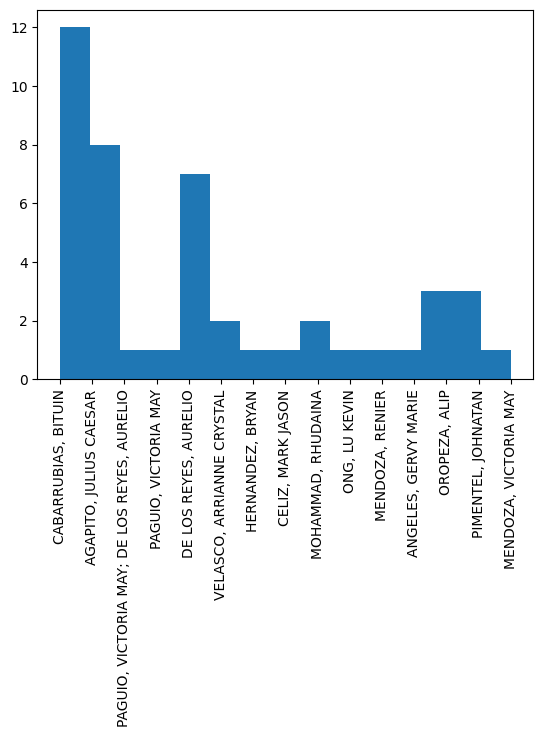

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[df['Number'] == '122']['Prof'], bins=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Example usage of predict_top_3_profs function
number = '150.1'
day = 'WF'
start_time = '13:00'
end_time = '14:30'

predicted_profs = predict_top_3_profs(number, day, start_time, end_time)
print(f'Top 3 predicted professors: {predicted_profs}')

Top 3 predicted professors: ['ESCANER, JOSE MARIA']


<ipython-input-74-d50663cafeba>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
<ipython-input-74-d50663cafeba>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0


In [ ]:
math162 = df[df['Number'] == '162']
math162[math162['Day'] == 'S']

,Number,Day,Prof,Year,Start_time,End_time
190,162,S,"BAGSIT, ALELIE",2018,12:00,15:00
160,162,S,"BAGSIT, ALELIE",2018,08:30,11:30
235,162,S,"BAGSIT, ALELIE",2019,10:00,13:00
210,162,S,"BAGSIT, ALELIE",2019,08:30,11:30
198,162,S,"BAGSIT, ALELIE",2020,08:30,11:30
199,162,S,"BAGSIT, ALELIE",2020,12:00,15:00
172,162,S,"SABANGAN, ALELIE",2020,08:30,11:30
173,162,S,"SABANGAN, ALELIE",2020,12:00,15:00
206,162,S,"SABANGAN, ALELIE",2022,10:00,13:00
207,162,S,"SABANGAN, ALELIE",2022,13:00,16:00
